In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


bins_num = 20

## Анализ спарсенных данных 

In [45]:
data = pd.read_csv('data/menziesartbrands_data.csv')


In [46]:
data.head()

,price,artist,title,yearCreation,image,image_url
0,49091,Reko Rennie,Bora,2010.0,1.jpg,/items/bora
1,49091,Guy Grey-smith,Horse and Jockey,1970.0,2.jpg,/items/horse-and-jockey
2,110455,Jeffrey Smart,"First Study for Waiting for the Hovercraft, Bo...",1986.0,3.jpg,/items/first-study-waiting-hovercraft-boulogne
3,184091,John Coburn,White Bird,1974.0,4.jpg,/items/white-bird
4,171818,BRETT WHITELEY,"View from the Window, Lavender Bay",1977.0,5.jpg,/items/view-window-lavender-bay


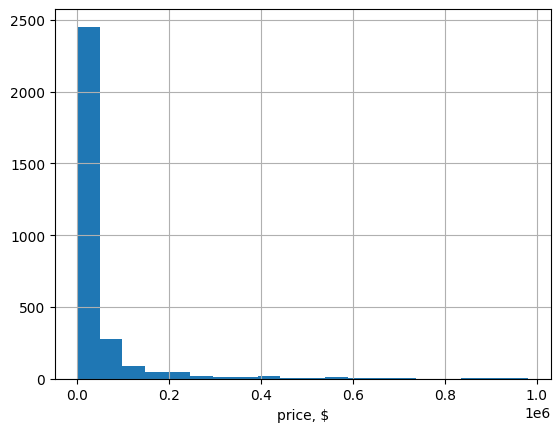

In [47]:
data['price'].hist(bins=bins_num)
plt.xlabel('price, $')
plt.show()

Посмотри без выбросов

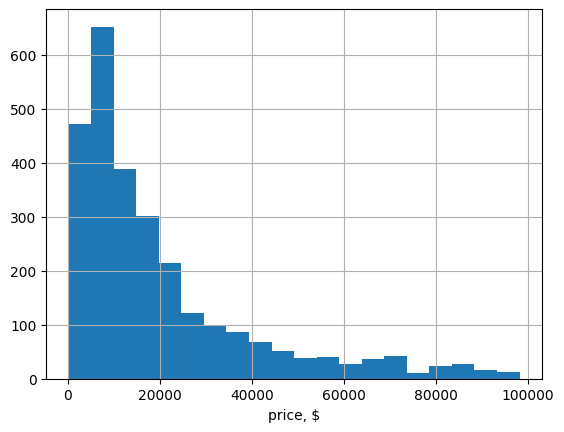

In [48]:
data['price'][data['price'] < 1e5].hist(bins=bins_num)
plt.xlabel('price, $')
plt.show()

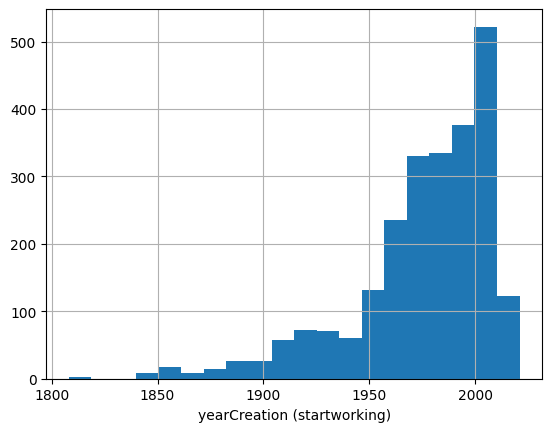

In [49]:
data['yearCreation'].hist(bins=20)
plt.xlabel('yearCreation (startworking)')
plt.show()

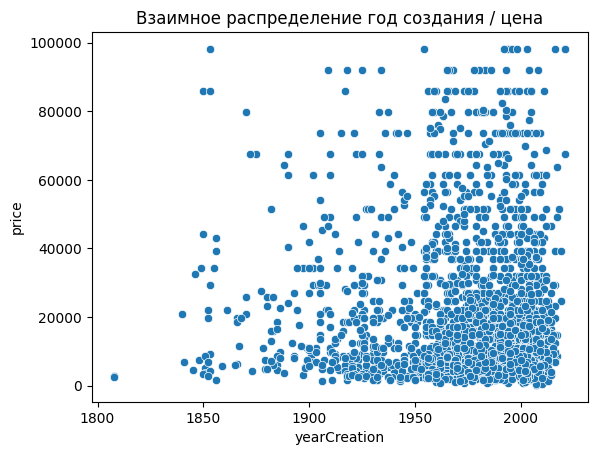

In [50]:
mask = data['price'] < 1e5
sns.scatterplot(data[mask], x="yearCreation", y="price")
plt.title("Взаимное распределение год создания / цена")
plt.show()

## Сравнение с тренировочной выборкой

In [51]:
train = pd.read_csv("../../notebooks/prepare_dataset/data/dataset/train/train.csv")
test =  pd.read_csv("../../notebooks/prepare_dataset/data/dataset/val/val.csv")

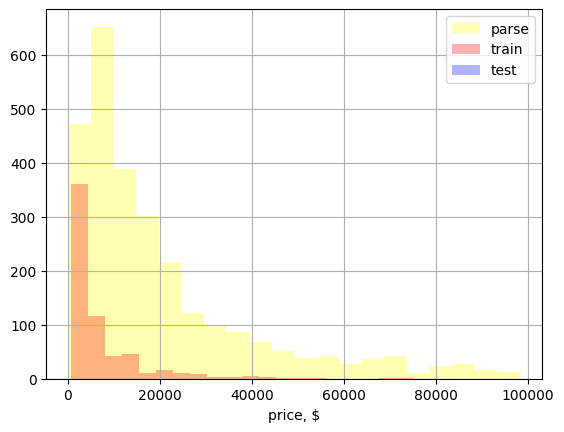

In [52]:
data['price'][data['price'] < 1e5].hist(bins=bins_num, color="yellow", alpha=0.3, label='parse')
train[train['price'] < 1e5]['price'].hist(bins=bins_num, color="red", alpha=0.3, label='train')
test[test['price'] < 1e5]['price'].hist(bins=bins_num, color="blue", alpha=0.3, label='test')

plt.xlabel('price, $')
plt.legend()
plt.show()

В тесте остались очнь маленькие цены

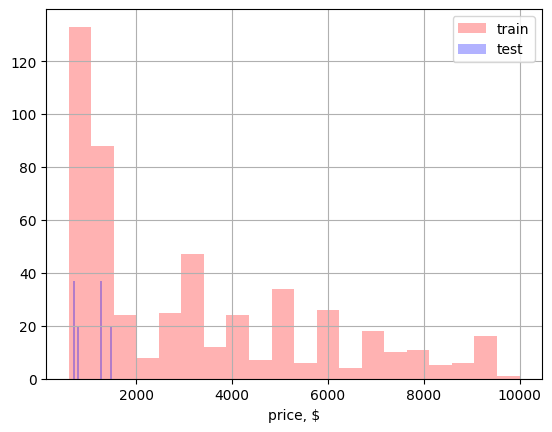

In [53]:
train[train['price'] < 1e4]['price'].hist(bins=bins_num, color="red", alpha=0.3, label='train')
test[test['price'] < 1e4]['price'].hist(bins=bins_num, color="blue", alpha=0.3, label='test')

plt.xlabel('price, $')
plt.legend()
plt.show()

Быстро обработаем yearCreation

In [54]:
train['yearCreation'] = train['yearCreation'].apply(lambda x: None if pd.isna(x)  else x.split(" ")[0].split("-")[0].split("/")[0] )\
.apply(lambda x: int(x) if str(x).isdecimal() else None)
test['yearCreation'] = test['yearCreation'].apply(lambda x: None if pd.isna(x)  else x.split(" ")[0].split("-")[0].split("/")[0] )\
.apply(lambda x: int(x) if str(x).isdecimal() else None)

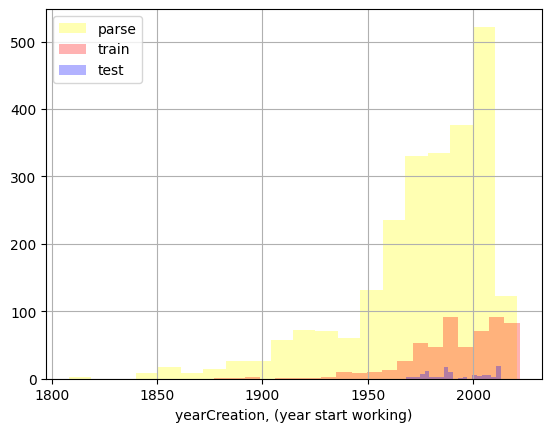

In [55]:
data['yearCreation'].hist(bins=bins_num, color="yellow", alpha=0.3, label='parse')
train['yearCreation'].hist(bins=bins_num, color="red", alpha=0.3, label='train')
test['yearCreation'].hist(bins=bins_num, color="blue", alpha=0.3, label='test')

plt.xlabel('yearCreation, (year start working)')
plt.legend()
plt.show()

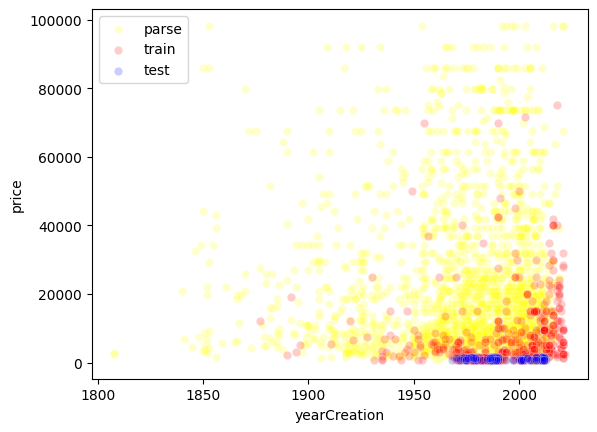

In [56]:
mask = data['price'] < 1e5
sns.scatterplot(data[mask], x="yearCreation", y="price", alpha=0.2, color="yellow",label='parse')
mask = train['price'] < 1e5
sns.scatterplot(train[mask], x="yearCreation", y="price", alpha=0.2, color="red",label='train')
mask = test['price'] < 1e5
sns.scatterplot(test[mask], x="yearCreation", y="price", alpha=0.2, color="blue",label='test')


plt.legend()
plt.show()